### Duolingo (DUOL)

## Technical Analysis

In [1]:
#import all necessary libraries
import numpy as np 
import pandas as pd
import pandas_datareader as web
import datetime as dt

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#The Duolingo IPO occurred on the Nasdaq on July 28 2021 under the ticker DUOL.
#set start of time frame as IPO, present as end
start = dt.datetime(2021, 7, 28)
end = dt.datetime.now()

#Store historical price data from Y! 
DUOL = web.DataReader('DUOL','yahoo',start,end)[['Adj Close']]

#Change in price from previous trading day; Daily gain/loss
DUOL['RET']=np.log(1+DUOL[['Adj Close']].pct_change())

In [3]:
DUOL.head()

,Adj Close,RET
Date,,
2021-07-28,134.255005,NaN
2021-07-29,134.440002,0.001377
2021-07-30,140.250000,0.042309
2021-08-02,143.800003,0.024997
2021-08-03,139.860001,-0.027782


In [4]:
DUOL.tail()

,Adj Close,RET
Date,,
2021-09-24,199.369995,-0.016515
2021-09-27,189.380005,-0.051407
2021-09-28,171.729996,-0.097832
2021-09-29,168.889999,-0.016676
2021-09-30,166.360001,-0.015093


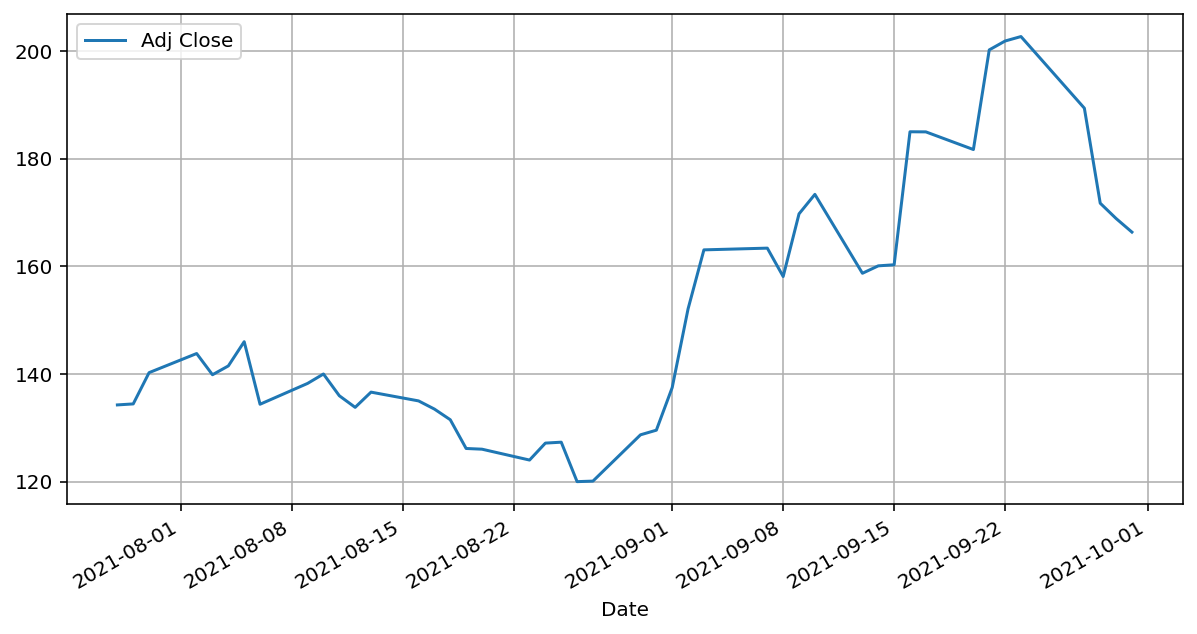

In [5]:
# Plot the DUOL price from start to end
DUOL.plot(y = 'Adj Close',figsize=(10,5), grid = True);

### Simple Moving Average

The Simple Moving Average is calculated using both the `rolling()` and `mean()` methods.

In [6]:
# Computing the 3-Day Simple Moving Average
DUOL['Adj Close'].rolling(3).mean().head(3)

Date
2021-07-28           NaN
2021-07-29           NaN
2021-07-30    136.315002
Name: Adj Close, dtype: float64

In [7]:
# Computing the 20-Day Simple Moving Standard Deviation
DUOL['Adj Close'].rolling(20).std().head(20)

Date
2021-07-28         NaN
2021-07-29         NaN
2021-07-30         NaN
2021-08-02         NaN
2021-08-03         NaN
2021-08-04         NaN
2021-08-05         NaN
2021-08-06         NaN
2021-08-09         NaN
2021-08-10         NaN
2021-08-11         NaN
2021-08-12         NaN
2021-08-13         NaN
2021-08-16         NaN
2021-08-17         NaN
2021-08-18         NaN
2021-08-19         NaN
2021-08-20         NaN
2021-08-23         NaN
2021-08-24    6.021081
Name: Adj Close, dtype: float64

In [8]:
# Computing the 30-Day and 200-Day Simple Moving Averages
DUOL['30D_Mean'] = DUOL['Adj Close'].rolling(30).mean()
DUOL['200D_Mean'] = DUOL['Adj Close'].rolling(200).mean()

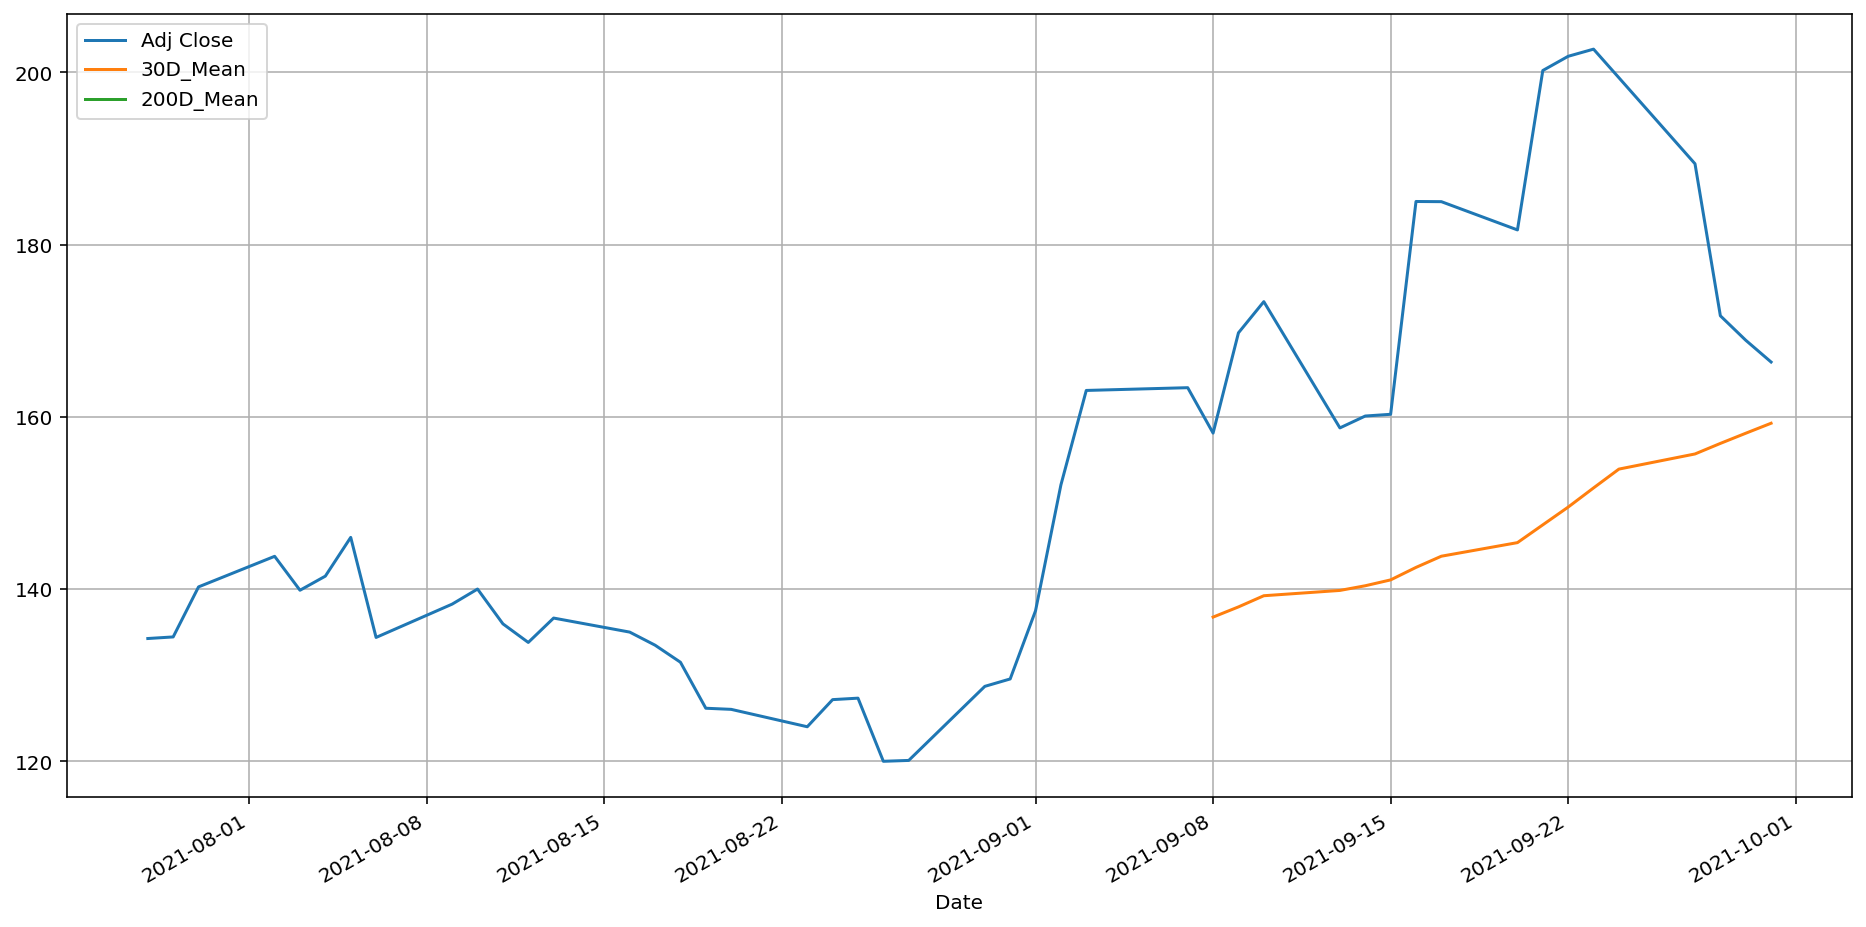

In [9]:
DUOL.plot(y = ['Adj Close','30D_Mean','200D_Mean'],
           figsize=(16,8), grid = True);

### Bollinger Bands

 Bollinger Bands are volatility bands around a moving average.

In [10]:
DUOL['Upper_BBand'] = DUOL['30D_Mean'] + 2*DUOL['Adj Close'].rolling(30).std()
DUOL['Lower_BBand'] = DUOL['30D_Mean'] - 2*DUOL['Adj Close'].rolling(30).std()

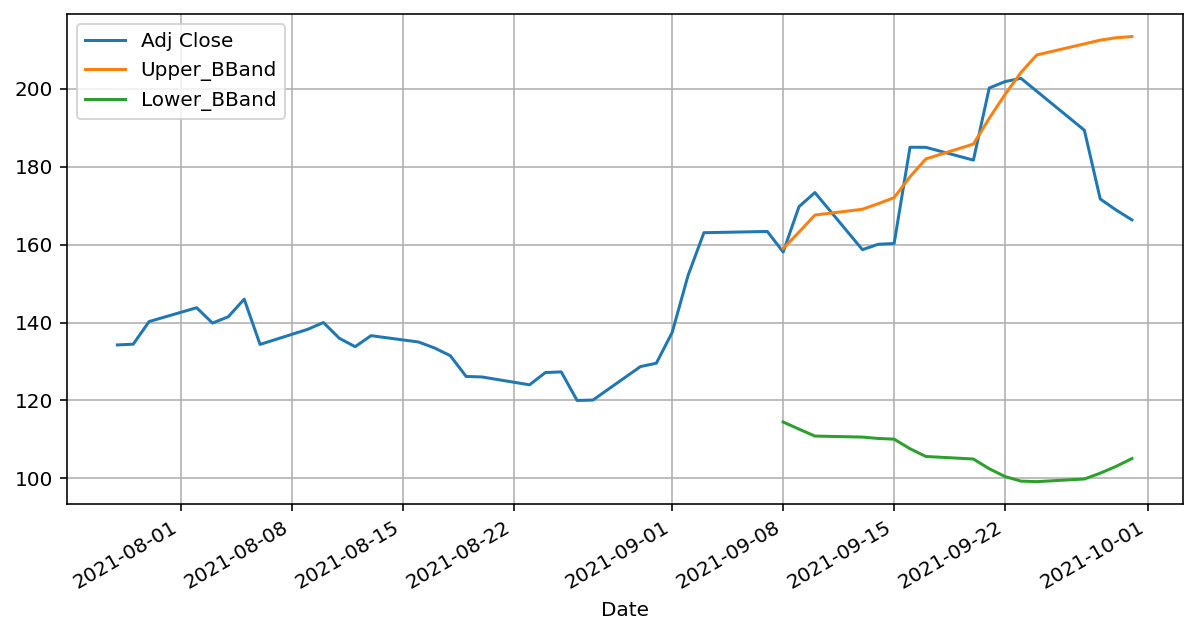

In [11]:
DUOL.plot(y = ['Adj Close','Upper_BBand','Lower_BBand'],
          figsize=(10,5), grid = True);

### Simple Moving Average Algorithmic Trading Strategy

Go long (Buy or +1) the asset when the short window MA (SMA) is higher than the long window MA (LMA), and Go Short (Sell or -1) otherwise 

In [12]:
DUOLv2 = DUOL[['Adj Close', 'RET']].copy()
DUOLv2.head()

,Adj Close,RET
Date,,
2021-07-28,134.255005,NaN
2021-07-29,134.440002,0.001377
2021-07-30,140.250000,0.042309
2021-08-02,143.800003,0.024997
2021-08-03,139.860001,-0.027782


In [13]:
SMA = 30
LMA = 200
DUOLv2['SMA']=DUOLv2['Adj Close'].rolling(SMA).mean()
DUOLv2['LMA']=DUOLv2['Adj Close'].rolling(LMA).mean()
DUOLv2.dropna(inplace=True)
DUOLv2.head()

,Adj Close,RET,SMA,LMA
Date,,,,


In [14]:
#Method 1
DUOLv2.loc[DUOLv2['SMA']>DUOLv2['LMA'],'Position']= 1
DUOLv2.loc[DUOLv2['SMA']<=DUOLv2['LMA'],'Position']= -1

ValueError: cannot set a frame with no defined index and a scalar

In [ ]:
Method 2
DUOLv2['Trading Decision2']= np.where(DUOLv2['SMA']>DUOLv2['LMA'],1,-1)

In [ ]:
DUOLv2.tail()

In [ ]:
DUOLv2['Strategy']=DUOLv2['Position'].shift(1)*DUOLv2['RET']
DUOLv2.dropna(inplace=True)

In [ ]:
DUOLv2['C_RET']=DUOLv2['RET'].cumsum()
DUOLv2['C_Strategy']=DUOLv2['Strategy'].cumsum()

In [ ]:
DUOLv2.head()

In [ ]:
DUOLv2[['C_RET','C_Strategy']].tail(1)

In [ ]:
DUOLv2[['RET','Strategy']].std()*250**0.5

In [ ]:
ax = DUOLv2.plot(y = ['C_RET','C_Strategy'],
             figsize=(10,5), grid = True)
DUOLv2['Position'].plot(ax=ax,secondary_y='Position',style='--')
ax.legend(loc='lower left');